In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad 
from numpy import sum, mean, linspace
from numpy import exp as e
from numpy.random import exponential
from numpy.random import rand
import matplotlib.pyplot as plt 
 

##	Directly solving the integral<br>
$$\int_0^1 \; (x+1) x^2 \; dx$$

In [3]:
def f(x): return (x+1)*x**2
I, err = quad(f, 0, 1) 
print('Integral using Numpy: %.3f'%I)

Integral using Numpy: 0.583


##	Using inversion sampling<br>
Start by using the definition of CDF function to find the inverse CDF function $F^{-1}$<br>
$$F(α) = \int_0^{\alpha} x^2 \; dx = \frac{1}{3} \alpha^3 \quad \implies \quad x = (3v)^{1/3}.$$<br>
This implies that if you generate uniform samples from 0 to 1, we can plug into v to generate sample for p(x)<br>
This integral becomes<br>
$$\int_0^1 \; (x+1) p(x \; \text{and}\; 0 \le x \le 1) \; dx = \int_0^1 \; (x+1) p(x | 0 \le x \le 1)  \underbrace{p(0 \le x \le 1)}_{\rho} \; dx \approx \frac{\rho}{n} \sum_i \; (x+1)$$

In [4]:
n = 20000
X = rand(n)
X2 = np.power(3*X, 1/3)
ρ = sum(X2 < 1)/len(X)
X2 = X2[X2 < 1]
print('Integral using Inversion Sampling : %.3f'% (mean(X2 + 1)*ρ))

Integral using Inversion Sampling : 0.591


##	Using Rejection sampling<br>
We are using an exponential distribution to approximate $p(x) = x^2$ <br>
First we need to figure out the k value by plotting it out.<br>
notice that if k=10, then we have kq(x) > p(x) to alway have a rejection region between 0 and 1.<br>
We can pick any $\theta$ for exponential distribution, to make it easier let's just pick $\theta=1$

In [5]:
def p(x): 
	try:
		x[x<0] = 0
		x[x>1.44225] = 0
	except:
		if x < 0: return 0
		if x > 1.44225: return 0
	return x**2

In [6]:
k = 10
x = linspace(0,1.44225, 20)
y1 = p(x)
y2 = k*e(-x)

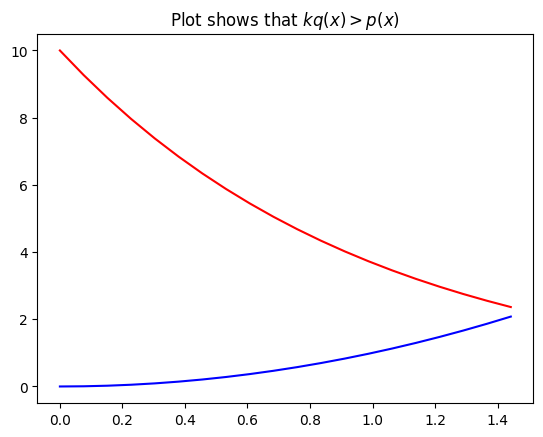

In [7]:
plt.title('Plot shows that $kq(x) > p(x)$')
plt.plot(x,y1, color='blue')
plt.plot(x,y2, color='red')
plt.show()

Now we can generate exponential distribution

In [8]:
X2 = []

In [9]:
while len(X2) < n:
	u = exponential(scale=1, size=1).item()
	kq = k*e(-u)
	pu = p(u)
	v = kq*rand()
	if v < pu: X2.append(u)	# accept 

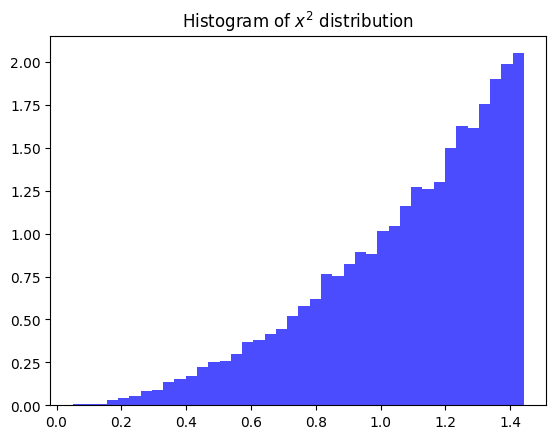

In [10]:
X2 = np.array(X2)
plt.hist(X2,bins = 40, alpha=0.7,color='blue',density=True)
plt.title('Histogram of $x^2$ distribution')
plt.show()

In [11]:
ρ = sum(X2 < 1)/len(X2)	# same logic applies here for ρ
X2 = X2[X2 < 1]
print('Integral using Rejection Sampling : %.3f'% (mean(X2 + 1)*ρ))

Integral using Rejection Sampling : 0.583


##	Using Importance sampling<br>
$$ \int_0^1 \; (x+1) p(x) \; dx = \int_0^1 \; (x+1) \frac{p(x)}{q(x)} q(x) \; dx $$<br>
In this case, we have a simple $q(x) = 1$ so<br>
$$	\int_0^1 \; (x+1) \frac{x^2}{1} q(x) \; dx \approx \frac{1}{n} \sum_i \; (x+1) x^2$$

In [12]:
X = rand(n)
print('Integral using importance sampling: %.3f'% (mean((X+1)*X**2)))

Integral using importance sampling: 0.582
